In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE 
from new_plot import *
set_things()


import os
import pandas as pd 
import numpy as np 
import json

a = ['annealing','BulkModulus','Density','Littleton','ND' ,'Shear_modulus','softening','TEC','TG','TLiq','YM','Hardness_RT','Hardness_misc','Poission'
     ,'Refractive_RT','Refractive_misc','thermal_conductivity']
b = ['annealing','BulkModulus','Density','Littleton','ND' ,'Shear_modulus','softening','TEC','TG','TLiq','YM','Hardness_RT','Hardness_misc'
     ,'Refractive_misc']

prop = 'TLiq'
base = "data_file_new/" + prop + ".csv"



/home/textile/btech/tt1191091/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The animation.avconv_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/home/textile/btech/tt1191091/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The animation.avconv_path rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/home/textile/btech/tt1191091/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The animation.html_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/home/textile/btech/tt1191091/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The keymap.all_axes rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/home/textile/bt

In [43]:
b = ['annealing','BulkModulus','Density','Littleton','ND' ,'Shear_modulus','softening','TEC','TG','TLiq','YM','Hardness_RT','Hardness_misc'
     ,'Refractive_misc']


In [44]:
# count= 0
# seed_df = pd.read_csv(base)
# seed_df = seed_df.iloc[:, :-1]

# sse = {}
# for k in range(2, 31):
#     kmeans = KMeans(n_clusters=k, max_iter=1000).fit(seed_df)
#     seed_df["clusters"] = kmeans.labels_
#     #print(data["clusters"])
#     sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
#     plt.figure()
#     plt.plot(list(sse.keys()), list(sse.values()))
#     plt.xlabel("Number of cluster")
#     plt.ylabel("SSE")
# #     plt.title(prop)
# #     plt.savefig(prop+'.png')
   
   

# All Composition and Property Combined

In [189]:
comp = pd.DataFrame()
for p in b:
    base = "data_file_new/" + p + ".csv"
    seed_df = pd.read_csv(base)
    print((p , seed_df.shape))
    seed_df = seed_df.iloc[:, :-1]
    comp = pd.concat([comp , seed_df] , sort = False)
comp = comp.fillna(0)
comp.shape
title_str = '24725, 51'

('annealing', (59, 5))
('BulkModulus', (190, 17))
('Density', (6632, 45))
('Littleton', (225, 18))
('ND', (469, 26))
('Shear_modulus', (486, 20))
('softening', (454, 11))
('TEC', (1005, 13))
('TG', (9196, 52))
('TLiq', (1762, 43))
('YM', (362, 23))
('Hardness_RT', (2959, 34))
('Hardness_misc', (822, 26))
('Refractive_misc', (104, 8))


In [195]:
def make_hill(x): 
    lable = '' 
    for i in x: 
        if i  in ['2','3','4','5','6','7','8','9']: 
            subs = "$_" + i  + "$" 
            lable = lable + subs 
        else: 
            lable = lable + i   
    return lable

k = 30
np.random.seed(2021)
seed_df = comp
prop = 'all_composition'
kmeans = KMeans(n_clusters=k, max_iter=1000 ,random_state = 2021).fit(seed_df)
seed_df["clusters"] = kmeans.labels_
seed_df.clusters = seed_df.clusters + 1
info = seed_df['clusters'].value_counts().sort_values()
info = pd.DataFrame(info)

info['PERCENTAGE'] = 100*info.clusters/info.clusters.sum()
info = info.sort_values('PERCENTAGE',ascending=False)

to_color = info[info['PERCENTAGE'] > 3].index.to_list()

print(len(to_color),to_color)

def set_label(x):
    if x in to_color:
        return x
    else:
        return 0

seed_df['color'] = seed_df['clusters'].apply(set_label) #coloring done



13 [3, 7, 10, 23, 26, 11, 8, 1, 15, 4, 2, 29, 14]


In [196]:
set_font(size=19, family='Arial', weight='normal')

seed_df['color'].unique()
unique_clusters = seed_df.color.unique()
labelling = {} #storing cluster id and corresponding glass family
dup = set()
for num in to_color:
    if num != 0:
        tempDF = seed_df[seed_df['clusters'] == num]
        tempDF = tempDF.drop(['clusters','color'],axis=1) 
        name = ','.join(sorted(list(tempDF.astype(bool).sum(axis=0).sort_values(ascending=False)[:3].index.to_list())))
#         dup.append(','.join(sorted(list(tempDF.astype(bool).sum(axis=0).sort_values(ascending=False)[:3].index.to_list()))))
        if name not in dup:
            labelling[num] =  name
            dup.add(name)
#         else:
#             name = ','.join(sorted(list(tempDF.astype(bool).sum(axis=0).sort_values(ascending=False)[:3].index.to_list())))
#             labelling[num] =  name
#             dup.append(name)
             
        else:
            name = ','.join(sorted(list(tempDF.astype(bool).sum(axis=0).sort_values(ascending=False)[:4].index.to_list())))
            if name not in dup:
                labelling[num] =  name
                dup.add(name)
            else:
                name = ','.join(sorted(list(tempDF.astype(bool).sum(axis=0).sort_values(ascending=False)[:5].index.to_list())))
                labelling[num] =  name
                dup.add(name)
        
#         print(num, name)
        
# print(len(to_color) == len(labelling))
l = {}
temp = []
for key, val in labelling.items():
    if val not in temp:
        temp.append(val)
        l[key] = val
labelling = l


3 Ga,Ge,S
7 Ga,Ge,Se
10 As,Ge,Se
23 As,Ge,S,Se
26 As,Ge,Se,Te
11 As,Ge,S
8 As,Ge,Te
1 As,Ge,Si,Te
15 As,Ge,S,Sb
4 Ge,Sb,Se
2 As,Se,Te
29 Ga,Ge,La,S
14 Ge,Se,Te
True


{3: 'Ga,Ge,S',
 7: 'Ga,Ge,Se',
 10: 'As,Ge,Se',
 23: 'As,Ge,S,Se',
 26: 'As,Ge,Se,Te',
 11: 'As,Ge,S',
 8: 'As,Ge,Te',
 1: 'As,Ge,Si,Te',
 15: 'As,Ge,S,Sb',
 4: 'Ge,Sb,Se',
 2: 'As,Se,Te',
 29: 'Ga,Ge,La,S',
 14: 'Ge,Se,Te'}

In [197]:
X_embedded = TSNE(n_components=2).fit_transform(seed_df[seed_df.columns[:-2]]) 

x_coordinate = {}
y_coordinate = {}
for key in labelling.keys(): 
    x_coordinate[key]  = X_embedded[:,0][seed_df['clusters']==key].mean() 
    y_coordinate[key]  = X_embedded[:,1][seed_df['clusters']==key].mean()

tsne_df = pd.DataFrame(data=X_embedded, columns=['x1','x2'])
tsne_df['color'] =  seed_df['color'].values
tsne_df.to_csv('tsne/' + prop +'_tsne_data.csv',index=False)

In [10]:
tsne_df.to_csv('tsne/' + prop +'_tsne_data.csv',index=False)

{4: 'As,Se,Tl',
 18: 'As,Ge,Se',
 15: 'Ge,S,Se',
 14: 'Se,As,Ge,Sn',
 1: 'Ga,Ge,Te',
 2: 'Ga,Ge,Se',
 3: 'Ga,Ge,S',
 8: 'As,S,Tl',
 20: 'Ge,Sb,Se',
 9: 'Se,Ge,As,Cu',
 22: 'As,Ge,Te',
 11: 'Tl,Se,As,Ge',
 6: 'As,Te,Ge,Se',
 5: 'B,Fe,P'}

[3, 7, 10, 23, 26, 11, 8, 1, 15, 4, 2, 29, 14]


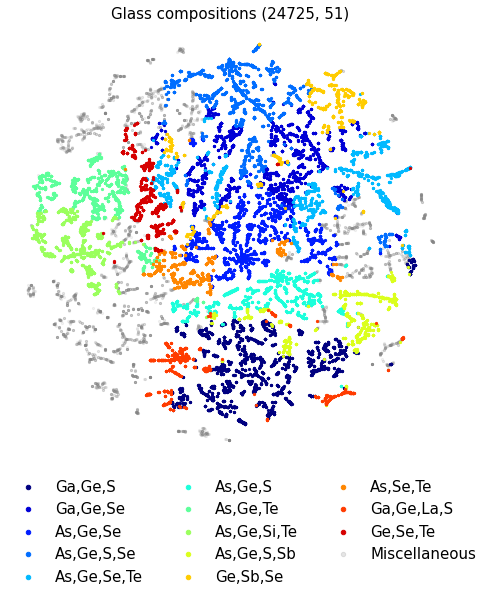

all_composition  --done


In [198]:
NUM_COLORS = len(labelling.keys())
cm = plt.get_cmap('jet') #'gist_ncar')
# cm = plt.get_cmap('nipy_spectral')
clrs = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]


prop = 'all_composition'
# tsne_df = pd.read_csv('tsne/' + prop +'_tsne_data.csv')

s = 5
set_font(size=15, family='Arial', weight='normal')
to_color = list(labelling.keys())
print(to_color)
mask = tsne_df.color==0
plt.scatter(tsne_df.x1[mask], tsne_df.x2[mask], c='gray',alpha=0.1,s=s)

for i in range(len(to_color)):
    c = int(to_color[i])
    mask = tsne_df.color==c
    if c == 0:
        pass
    else:
        plt.scatter(tsne_df.x1[mask], tsne_df.x2[mask],color=clrs[i],s=s, label= make_hill(labelling[(c)]))


mask = tsne_df.color==0
plt.scatter(tsne_df.x1[mask].iloc[0], tsne_df.x2[mask].iloc[0], c='k',alpha=0.1,s=s,label='Miscellaneous')
plt.box(on=None)
plt.legend(markerscale=2,loc = [0,-0.3],ncol=3, frameon = False)
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.title('Glass compositions ({})'.format(title_str))
plt.box(on=None)
plt.axis('off')
plt.savefig('tsne/plots/'+ prop +'_tsne.png',bbox_inches='tight', dpi = 1200)
plt.show()
plt.close()
print(prop + "  --done")

# Individual Property

In [ ]:
b = ['annealing','BulkModulus','Density','Littleton','ND' ,'Shear_modulus','softening','TEC','TG','TLiq','YM','Hardness_RT','Hardness_misc'
     ,'Refractive_misc']



In [184]:
prop = 'Refractive_misc'
title = "Refractive Index at Any Temperature"

In [185]:
def make_hill(x): 
    lable = '' 
    for i in x: 
        if i  in ['2','3','4','5','6','7','8','9']: 
            subs = "$_" + i  + "$" 
            lable = lable + subs 
        else: 
            lable = lable + i   
    return lable

base = "data_file_new/" + prop + ".csv"
k = 30
seed_df = pd.read_csv(base)
seed_df = seed_df.iloc[:, :-1]
seed_df = seed_df.dropna()
kmeans = KMeans(n_clusters=k, max_iter=1000).fit(seed_df)
seed_df["clusters"] = kmeans.labels_
seed_df.clusters = seed_df.clusters + 1
info = seed_df['clusters'].value_counts().sort_values()
info = pd.DataFrame(info)

info['PERCENTAGE'] = 100*info.clusters/info.clusters.sum()
info = info.sort_values('PERCENTAGE',ascending=False)

to_color = info[info['PERCENTAGE'] > 3].index.to_list()

print(len(to_color),to_color)

def set_label(x):
    if x in to_color:
        return x
    else:
        return 0

seed_df['color'] = seed_df['clusters'].apply(set_label) #coloring done



11 [4, 16, 28, 2, 26, 12, 23, 19, 6, 13, 3]


In [186]:
set_font(size=19, family='Arial', weight='normal')

seed_df['color'].unique()
unique_clusters = seed_df.color.unique()
labelling = {} #storing cluster id and corresponding glass family
dup = set()
for num in to_color:
    if num != 0:
        tempDF = seed_df[seed_df['clusters'] == num]
        tempDF = tempDF.drop(['clusters','color'],axis=1) 
        name = ','.join(sorted(list(tempDF.astype(bool).sum(axis=0).sort_values(ascending=False)[:3].index.to_list())))
#         dup.append(','.join(sorted(list(tempDF.astype(bool).sum(axis=0).sort_values(ascending=False)[:3].index.to_list()))))
        if name not in dup:
            labelling[num] =  name
            dup.add(name)
#         else:
#             name = ','.join(sorted(list(tempDF.astype(bool).sum(axis=0).sort_values(ascending=False)[:3].index.to_list())))
#             labelling[num] =  name
#             dup.append(name)
             
        else:
            name = ','.join(sorted(list(tempDF.astype(bool).sum(axis=0).sort_values(ascending=False)[:4].index.to_list())))
            if name not in dup:
                labelling[num] =  name
                dup.add(name)
            else:
                name = ','.join(sorted(list(tempDF.astype(bool).sum(axis=0).sort_values(ascending=False)[:5].index.to_list())))
                labelling[num] =  name
                dup.add(name)
        
        print(num, name)
        
print(len(to_color) == len(labelling))
l = {}
temp = []
for key, val in labelling.items():
    if val not in temp:
        temp.append(val)
        l[key] = val
labelling = l
labelling

4 Ga,Ge,S
16 As,Ga,Ge,S
28 As,Ga,Ge,La,S
2 Ga,La,S
26 Ge,Se,Te
12 As,Ge,Se
23 As,Ge,Se,Te
19 As,Ga,Ge,Se,Te
6 As,Ga,Ge,Se
13 As,Ge,S
3 As,Ga,Ge,Se,Te
True


{4: 'Ga,Ge,S',
 16: 'As,Ga,Ge,S',
 28: 'As,Ga,Ge,La,S',
 2: 'Ga,La,S',
 26: 'Ge,Se,Te',
 12: 'As,Ge,Se',
 23: 'As,Ge,Se,Te',
 19: 'As,Ga,Ge,Se,Te',
 6: 'As,Ga,Ge,Se',
 13: 'As,Ge,S'}

In [187]:
X_embedded = TSNE(n_components=2).fit_transform(seed_df[seed_df.columns[:-2]]) 

x_coordinate = {}
y_coordinate = {}
for key in labelling.keys(): 
    x_coordinate[key]  = X_embedded[:,0][seed_df['clusters']==key].mean() 
    y_coordinate[key]  = X_embedded[:,1][seed_df['clusters']==key].mean()

tsne_df = pd.DataFrame(data=X_embedded, columns=['x1','x2'])
tsne_df['color'] =  seed_df['color'].values
tsne_df.to_csv('tsne/' + prop +'_tsne_data.csv',index=False)

[4, 16, 28, 2, 26, 12, 23, 19, 6, 13]


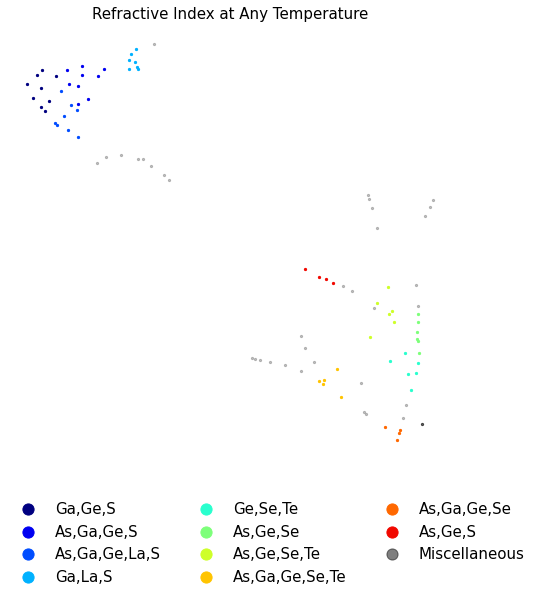

Refractive_misc  --done


In [188]:
NUM_COLORS = len(labelling.keys())
cm = plt.get_cmap('jet') #'gist_ncar')
# cm = plt.get_cmap('nipy_spectral')
clrs = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]


# tsne_df = pd.read_csv('tsne/' + prop +'_tsne_data.csv')

s = 5
set_font(size=15, family='Arial', weight='normal')
to_color = list(labelling.keys())
print(to_color)
mask = tsne_df.color==0
plt.scatter(tsne_df.x1[mask], tsne_df.x2[mask], c='gray',alpha=0.5,s=s)

for i in range(len(to_color)):
    c = int(to_color[i])
    mask = tsne_df.color==c
    if c == 0:
        pass
    else:
        plt.scatter(tsne_df.x1[mask], tsne_df.x2[mask],color=clrs[i],s=s, label= make_hill(labelling[(c)]))


mask = tsne_df.color==0
plt.scatter(tsne_df.x1[mask].iloc[0], tsne_df.x2[mask].iloc[0], c='k',alpha=0.5,s=s,label='Miscellaneous')
plt.box(on=None)
plt.legend(markerscale=5,loc = [0,-0.3],ncol=3, frameon = False)
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.title(title)
plt.box(on=None)
plt.axis('off')
plt.savefig('tsne/plots/'+ prop +'_tsne.png',bbox_inches='tight', dpi = 1200)
plt.show()
plt.close()
print(prop + "  --done")